In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome()

In [2]:
driver.get('https://netology.ru/development')
cards = WebDriverWait(driver,10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "programCard_root__7g9NK"))
)   

In [3]:
courses = []
links = []
for card in cards:
    name = card.find_element(By.CLASS_NAME, '_eading_heading__K1tOF')
    courses.append(name.text)
    link = card.get_attribute('href')
    links.append(link)

In [4]:
df = pd.DataFrame({'Course':courses, 'Link':links, 'Price':None})


In [5]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

for index, row in df.iterrows():
    driver.get(row['Link'])
    
    try:
        # Пробуем найти первый класс
        prices = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, "styles_price__Yfebc"))
        )
        print(row['Course'], [price.text for price in prices])
        if len(prices[0].text) == 0:
            row['Price'] = int(prices[1].text.replace("\n ₽", "").replace(" ", ""))
        else:
   
            row['Price'] = int(prices[0].text.replace("\n ₽", "").replace(" ", ""))
    except TimeoutException:
        # Если первый класс не найден, пробуем второй
        try:
            prices = WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located((By.CLASS_NAME, "styles_currentPrice__Pf7BA"))
            )
            print(row['Course'], [price.text for price in prices])
            if len(prices[0].text) == 0:
                row['Price'] = int(prices[1].text.replace("\n ₽", "").replace(" ", ""))
            else:

                row['Price'] = int(prices[0].text.replace("\n ₽", "").replace(" ", ""))
        except TimeoutException:
            print(f"Для курса {row['Course']} цена не найдена по обоим классам")
    print(row['Course'], row['Price'])
    time.sleep(1)

1C-программист: расширенный курс ['109 400', '119 100']
1C-программист: расширенный курс 109400
Devops-инженер с нуля: расширенный курс ['125 400', '155 400']
Devops-инженер с нуля: расширенный курс 125400
Python-разработчик: расширенный курс ['105 000', '130 200']
Python-разработчик: расширенный курс 105000
Специалист по информационной безопасности: расширенный курс ['', '128 300\n ₽']
Специалист по информационной безопасности: расширенный курс 128300
Инженер по автоматизации ['96 100', '50 000']
Инженер по автоматизации 96100
Fullstack-разработчик на Python ['130 200', '169 100']
Fullstack-разработчик на Python 130200
Java-разработчик с нуля ['', '131 100\n ₽']
Java-разработчик с нуля 131100
Системный администратор ['', '99 200\n ₽']
Системный администратор 99200
SQL и получение данных ['33 000', '49 700']
SQL и получение данных 33000
Сетевой инженер ['84 400', '115 100', '212 900']
Сетевой инженер 84400
Android-разработчик с нуля ['', '111 300\n ₽']
Android-разработчик с нуля 111300

In [6]:
driver.quit()

In [8]:
df.dropna(inplace=True)
df

,Course,Link,Price
0,1C-программист: расширенный курс,https://netology.ru/programs/developer1c_ultimate,109400
1,Devops-инженер с нуля: расширенный курс,https://netology.ru/programs/fullstack-devops,125400
2,Python-разработчик: расширенный курс,https://netology.ru/programs/python,105000
3,Специалист по информационной безопасности: рас...,https://netology.ru/programs/informationsecurity,128300
4,Инженер по автоматизации,https://netology.ru/programs/automation-engineer,96100
5,Fullstack-разработчик на Python,https://netology.ru/programs/fullstack-python-dev,130200
6,Java-разработчик с нуля,https://netology.ru/programs/java-developer,131100
7,Системный администратор,https://netology.ru/programs/sysadmin,99200
8,SQL и получение данных,https://netology.ru/programs/sql-lessons,33000
9,Сетевой инженер,https://netology.ru/programs/network-engineer,84400


[109400 125400 105000 128300 96100 130200 131100 99200 33000 84400 111300
 99800 280000 107500 130000 105000 133000 118000 81700 143200 109400
 118800 28500 175000 122500 26600 26600 140000 235000 140000 140000 220000
 245000 990]


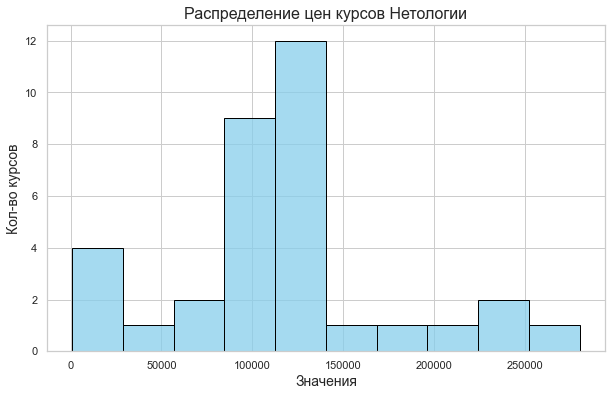

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
prices = df['Price'].to_numpy()

sns.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
sns.histplot(prices, color='skyblue', bins=10, edgecolor='black')

# Добавление заголовка и подписей осей
plt.title('Распределение цен курсов Нетологии', fontsize=16)
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Кол-во курсов', fontsize=14)

# Отображение графика
plt.show()

In [23]:
def displayCourses():
    plt.figure(figsize=(12, 4))
    sns.set_style("whitegrid")

    table = plt.table(cellText=df_sorted.values,
                    colLabels=df_sorted.columns,
                    loc='center',
                    cellLoc='center',
                    colColours=['#f0f0f0']*len(df.columns)) 

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5) 

    plt.axis('off')

    plt.show()

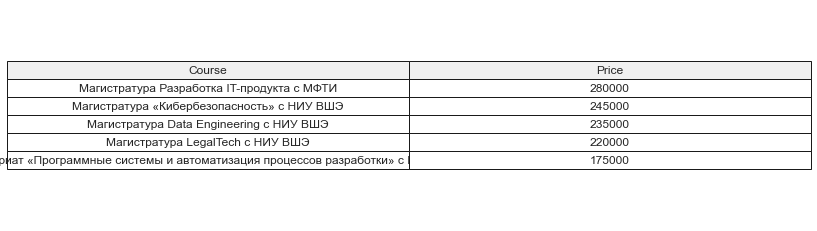

In [24]:
df_sorted = df.sort_values(by='Price', ascending=False)
del df_sorted['Link']
df_sorted = df_sorted.head()
displayCourses()

Только программы бакалавриата и магистратуры - не подходит - смотрим дальше

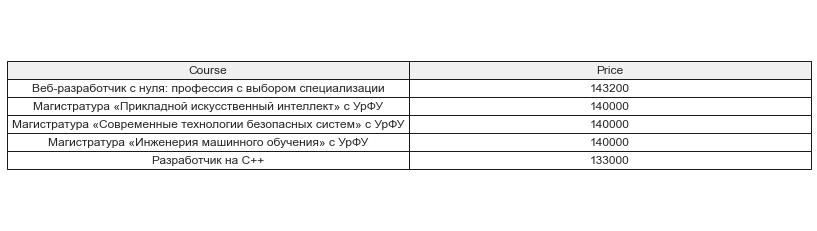

In [25]:
df_sorted = df.sort_values(by='Price', ascending=False)
del df_sorted['Link']
df_sorted = df_sorted.iloc[5:10]
displayCourses()

Тоже в основном программы магистратуры. Идем дальше

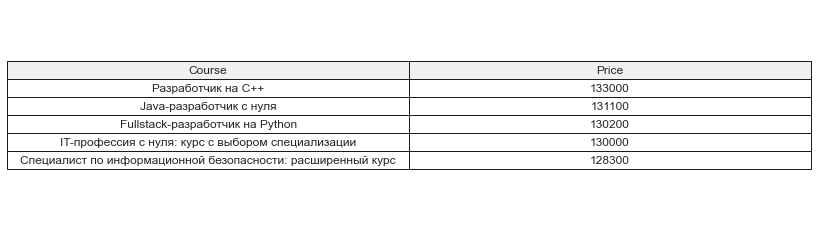

In [26]:
df_sorted = df.sort_values(by='Price', ascending=False)
del df_sorted['Link']
df_sorted = df_sorted.iloc[9:14]
displayCourses()